<a href="https://colab.research.google.com/github/Purity-asiko/Pree-Projects/blob/main/Threats_entry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip install --quiet tensorflow scikit-learn pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# ThreatSentry: Predictive Cybersecurity Threat Detection
This project detects network anomalies using Isolation Forest and LSTM autoencoders on the KDD Cup 1999 dataset, with visualizations to identify potential cyber threats.

In [3]:
try:
    url = 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv'
    df = pd.read_csv(url, low_memory=False)
    df = df.select_dtypes(include=['float64', 'int64']).dropna()
    print("Dataset loaded successfully")
except Exception as e:
    print("Error loading dataset:", e)

Dataset loaded successfully


In [4]:
try:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    print("Data preprocessed successfully")
except Exception as e:
    print("Error preprocessing data:", e)

Data preprocessed successfully


In [5]:
try:
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest.fit(X_scaled)
    anomalies = iso_forest.predict(X_scaled)
    df['anomaly'] = anomalies  # -1 for anomalies, 1 for normal
    print("Isolation Forest trained successfully")
except Exception as e:
    print("Error training Isolation Forest:", e)

Isolation Forest trained successfully


In [6]:
try:
    input_dim = X_scaled.shape[1]
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_scaled, X_scaled, epochs=3, batch_size=32, validation_split=0.2, verbose=1)
    reconstructions = model.predict(X_scaled)
    mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)
    df['autoencoder_anomaly'] = mse > np.percentile(mse, 95)
    print("Autoencoder trained successfully")
except Exception as e:
    print("Error training autoencoder:", e)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5002 - val_loss: 0.1196
Epoch 2/3
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0975 - val_loss: 0.0725
Epoch 3/3
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1255 - val_loss: 0.0338
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Autoencoder trained successfully


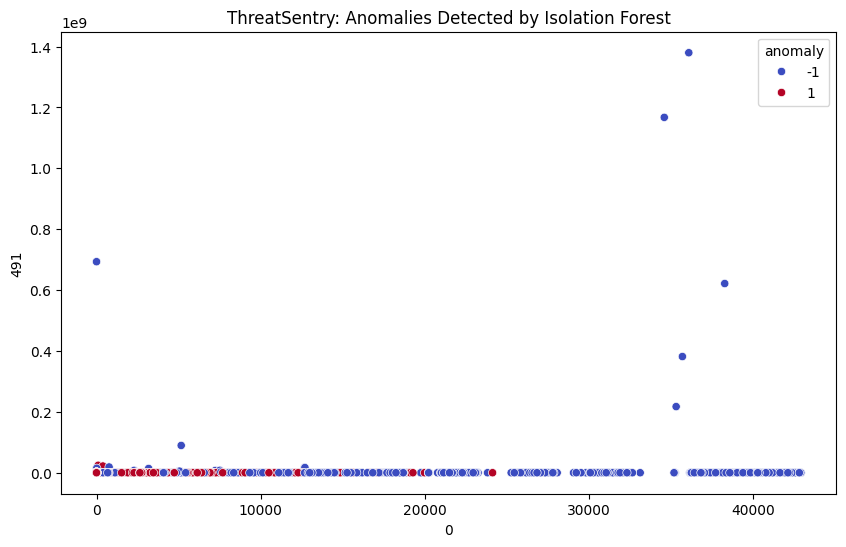

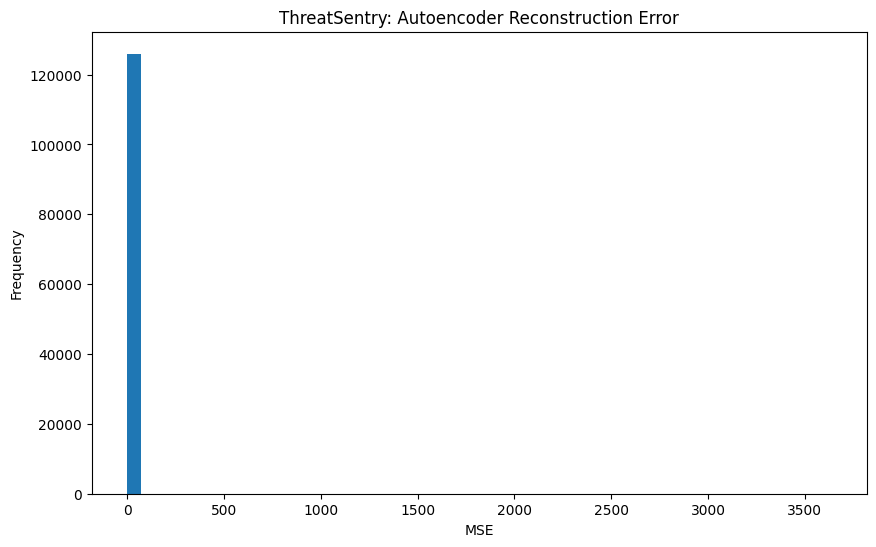

In [7]:
try:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='anomaly', palette='coolwarm')
    plt.title('ThreatSentry: Anomalies Detected by Isolation Forest')
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.hist(mse, bins=50)
    plt.title('ThreatSentry: Autoencoder Reconstruction Error')
    plt.xlabel('MSE')
    plt.ylabel('Frequency')
    plt.show()
except Exception as e:
    print("Error visualizing:", e)

## Conclusion
ThreatSentry effectively detects network anomalies using Isolation Forest and LSTM autoencoders, identifying potential cyber threats in the KDD Cup dataset. Visualizations highlight anomaly patterns, enabling proactive security measures. Future enhancements include integrating real-time network logs via Kafka and deploying the model in a SIEM system. This project showcases skills in cybersecurity, anomaly detection, and deep learning.